In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, RidgeCV, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt


%matplotlib inline

In [2]:
# Read training CSV
PATH = './'
df = pd.read_csv(PATH+"training_data.csv")

C:\Users\pathi\AppData\Local\Temp\ipykernel_26268\2617141847.py:3: DtypeWarning: Columns (6,54) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(PATH+"training_data.csv")


In [3]:
df.head()

,PolicyNo,Policy_Company,Policy_Installment_Term,Policy_Billing_Code,Policy_Method_Of_Payment,Policy_Reinstatement_Fee_Indicator,Policy_Zip_Code_Garaging_Location,Vehicle_Territory,Vehicle_Make_Year,Vehicle_Make_Description,...,EEA_Prior_Bodily_Injury_Limit,EEA_PolicyYear,SYS_Renewed,SYS_New_Business,Annual_Premium,Claim_Count,Loss_Amount,Frequency,Severity,Loss_Ratio
0,164532941,Standard,6,Direct Billed to Insured,Pre-paid,N,43046,35,2004,BUIK LESABRE LI,...,100-400,2006,Y,N,320.12,0,0.0,0.0,0.0,0.0
1,164533241,Standard,6,Direct Billed to Insured,Pre-paid,N,Unknown,35,1980,CADILLAC 4-DOOR,...,100-200,2006,Y,N,259.70,0,0.0,0.0,0.0,0.0
2,164534633,Standard,6,Direct Billed to Insured,Pre-paid,N,43555,17,2005,PONT MONTANA SV,...,100-400,2006,Y,N,613.74,0,0.0,0.0,0.0,0.0
3,164534839,Standard,6,Direct Billed to Insured,Pre-paid,N,43561,17,2005,MERC GRAND MARQ,...,40-100,2006,Y,N,541.66,0,0.0,0.0,0.0,0.0
4,164534840,Standard,6,Direct Billed to Insured,Pre-paid,N,43561,17,2005,MERC GRAND MARQ,...,40-100,2006,Y,N,541.66,0,0.0,0.0,0.0,0.0


In [4]:
# Data stats
df.describe()

,PolicyNo,Policy_Installment_Term,Vehicle_Territory,Vehicle_Make_Year,Vehicle_New_Cost_Amount,Vehicle_Symbol,Vehicle_Number_Of_Drivers_Assigned,Vehicle_Miles_To_Work,Vehicle_Days_Per_Week_Driven,Vehicle_Age_In_Years,...,Driver_Total_Upper_Senior_Ages_70_plus,Vehicle_Driver_Points,EEA_Policy_Tenure,EEA_PolicyYear,Annual_Premium,Claim_Count,Loss_Amount,Frequency,Severity,Loss_Ratio
count,4.244310e+05,424431.000000,424431.000000,424431.000000,424431.000000,424431.000000,424431.000000,424431.000000,424431.000000,424431.000000,...,424431.000000,424431.000000,424431.000000,424431.0,424431.000000,424431.000000,4.244310e+05,424431.000000,4.244310e+05,424431.000000
mean,3.144874e+08,6.224701,31.051629,1996.753482,290.333958,11.192347,28.397318,3.302400,4.998798,7.037130,...,0.096454,0.119765,5.886341,2006.0,335.354228,0.046893,2.354292e+02,0.115018,2.267193e+02,1.154623
std,5.776142e+07,1.139174,4.186688,7.388605,2876.619060,4.007123,43.952581,7.698294,0.080719,2.576152,...,0.314316,0.383814,6.646432,0.0,206.291385,0.223597,3.399225e+03,1.636176,3.337804e+03,55.153868
min,1.645329e+08,6.000000,13.000000,1924.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,1.000000,...,0.000000,0.000000,-1.000000,2006.0,0.540000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,2.832442e+08,6.000000,30.000000,1993.000000,-1.000000,8.000000,1.000000,-1.000000,5.000000,5.000000,...,0.000000,0.000000,1.200000,2006.0,157.940000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
50%,3.326177e+08,6.000000,31.000000,1998.000000,-1.000000,11.000000,1.000000,-1.000000,5.000000,9.000000,...,0.000000,0.000000,3.500000,2006.0,328.580000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
75%,3.612798e+08,6.000000,35.000000,2002.000000,-1.000000,14.000000,99.000000,6.000000,5.000000,9.000000,...,0.000000,0.000000,8.300000,2006.0,445.200000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
max,3.823488e+08,12.000000,37.000000,2008.000000,99999.000000,27.000000,99.000000,99.000000,9.000000,9.000000,...,2.000000,7.000000,54.000000,2006.0,3941.080000,5.000000,1.072292e+06,370.370370,1.072292e+06,24787.140000


In [5]:
# Check which columns have missing rows
df.isna().any().head(42)

PolicyNo                                    False
Policy_Company                              False
Policy_Installment_Term                     False
Policy_Billing_Code                         False
Policy_Method_Of_Payment                    False
Policy_Reinstatement_Fee_Indicator          False
Policy_Zip_Code_Garaging_Location           False
Vehicle_Territory                           False
Vehicle_Make_Year                           False
Vehicle_Make_Description                    False
Vehicle_Performance                         False
Vehicle_New_Cost_Amount                     False
Vehicle_Symbol                              False
Vehicle_Number_Of_Drivers_Assigned          False
Vehicle_Usage                               False
Vehicle_Miles_To_Work                       False
Vehicle_Days_Per_Week_Driven                False
Vehicle_Annual_Miles                        False
Vehicle_Anti_Theft_Device                   False
Vehicle_Passive_Restraint                   False


In [6]:
# 17,326 NaN values in Vehicle_Bodily_Injury_Limit
df[df['Vehicle_Bodily_Injury_Limit'].isnull() == True]['Vehicle_Bodily_Injury_Limit']

6         NaN
33        NaN
140       NaN
170       NaN
205       NaN
         ... 
424384    NaN
424417    NaN
424421    NaN
424426    NaN
424430    NaN
Name: Vehicle_Bodily_Injury_Limit, Length: 17326, dtype: object

<Axes: xlabel='Loss_Amount'>

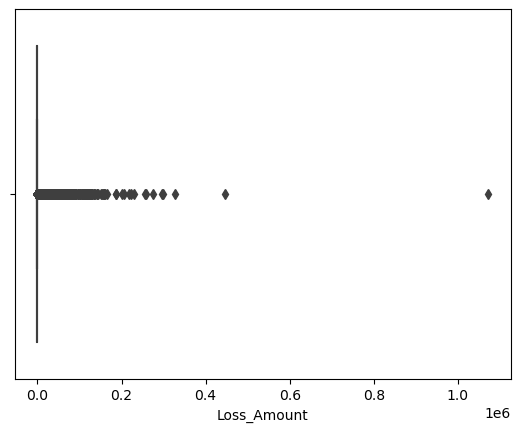

In [7]:
# Outliers found in Loss Amount column
field = 'Loss_Amount'
sns.boxplot(x=df[field])

<Axes: xlabel='Loss_Amount'>

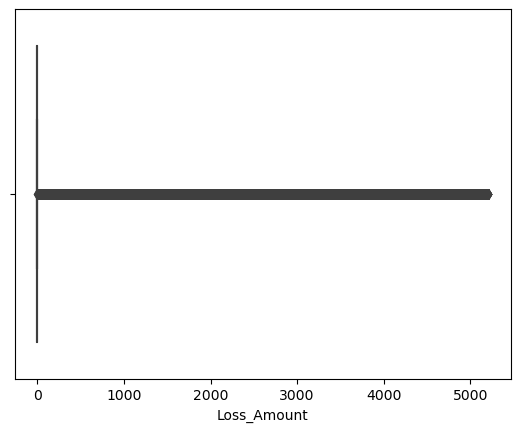

In [8]:
# Large outliers removed based on Loss_Amount
q = df["Loss_Amount"].quantile(0.99)
df = df[df['Loss_Amount'] < q]
sns.boxplot(x=df[field])

In [9]:
# Creates features for each portfolio, every portfolio being made from a chunk of policies(rows in the original dataframe) of size numOfPolicy
def create_porfolios(frame, frameId, numOfPolicy):
    leftBoundary = frameId * numOfPolicy
    rightBoundary = leftBoundary + numOfPolicy
    dataframe = frame.iloc[leftBoundary:rightBoundary]

    # Handling missing values
    dataframe['Vehicle_Bodily_Injury_Limit'].fillna('Unknown', inplace=True)
    dataframe['EEA_Prior_Bodily_Injury_Limit'].fillna('Unknown', inplace=True)
    
    total_policies = len(dataframe)
    vatd_na = len(dataframe[dataframe['Vehicle_Anti_Theft_Device'] == 'Not Applicable']) / total_policies
    vatd_passive = len(dataframe[dataframe['Vehicle_Anti_Theft_Device'] == 'Passive Disabling-Vehicle Recovery']) / total_policies
    vatd_alarm = len(dataframe[dataframe['Vehicle_Anti_Theft_Device'] == 'Alarm Only']) / total_policies
    vatd_active = len(dataframe[dataframe['Vehicle_Anti_Theft_Device'] == 'Active Disabling']) / total_policies

    dma_mean = dataframe['Driver_Minimum_Age'].mean()
    dma_std = dataframe['Driver_Minimum_Age'].std()
    vay_mean = dataframe['Vehicle_Age_In_Years'].mean()
    vay_std = dataframe['Vehicle_Age_In_Years'].std()
    ap_mean = dataframe['Annual_Premium'].mean()
    ap_std = dataframe['Annual_Premium'].std()
    
    ln_LR = np.log(dataframe['Loss_Amount'].sum() / dataframe['Annual_Premium'].sum())

    data = {'DMA_MEAN': dma_mean, 'DMA_STD': dma_std, 'VAY_MEAN': vay_mean,
            'VAY_STD': vay_std, 'AP_MEAN': ap_mean, 'AP_STD': ap_std,
            'ln_LR': ln_LR,
#             'VATD_Active': vatd_active,
#             'VATD_Alarm': vatd_alarm,
#             'VATD_NA': vatd_na,
            'VATD_Passive': vatd_passive}

    return data

In [10]:
# Features and target
columns = ['DMA_MEAN', 'DMA_STD', 'VAY_MEAN', 'VAY_STD', 'AP_MEAN', 'AP_STD', 'ln_LR',
#            'VATD_Active',
#         'VATD_Alarm',
#         'VATD_NA',
        'VATD_Passive']

In [11]:
# Create empty dataframe with column names
df_feats = pd.DataFrame(columns=columns)

In [12]:
# Num of policies per portfolio
# For loop creates dataframe containing all the portfolios
policy_num_per_portfolio = 3000
for i in range(0, int(df.shape[0] / policy_num_per_portfolio)):
    data = pd.DataFrame(create_porfolios(df, i, policy_num_per_portfolio), [i])
    df_feats = pd.concat([df_feats, data], ignore_index=True)

C:\Users\pathi\AppData\Local\Temp\ipykernel_26268\3448754304.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Vehicle_Bodily_Injury_Limit'].fillna('Unknown', inplace=True)
C:\Users\pathi\AppData\Local\Temp\ipykernel_26268\3448754304.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['EEA_Prior_Bodily_Injury_Limit'].fillna('Unknown', inplace=True)
C:\Users\pathi\AppData\Local\Temp\ipykernel_26268\3448754304.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\pathi\AppData\Local\Temp\ipykernel_26268\3448754304.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['EEA_Prior_Bodily_Injury_Limit'].fillna('Unknown', inplace=True)
C:\Users\pathi\AppData\Local\Temp\ipykernel_26268\3448754304.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Vehicle_Bodily_Injury_Limit'].fillna('Unknown', inplace=True)
C:\Users\pathi\AppData\Local\Temp\ipykernel_26268\3448754304.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\pathi\AppData\Local\Temp\ipykernel_26268\3448754304.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Vehicle_Bodily_Injury_Limit'].fillna('Unknown', inplace=True)
C:\Users\pathi\AppData\Local\Temp\ipykernel_26268\3448754304.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['EEA_Prior_Bodily_Injury_Limit'].fillna('Unknown', inplace=True)
C:\Users\pathi\AppData\Local\Temp\ipykernel_26268\3448754304.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\pathi\AppData\Local\Temp\ipykernel_26268\3448754304.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Vehicle_Bodily_Injury_Limit'].fillna('Unknown', inplace=True)
C:\Users\pathi\AppData\Local\Temp\ipykernel_26268\3448754304.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['EEA_Prior_Bodily_Injury_Limit'].fillna('Unknown', inplace=True)
C:\Users\pathi\AppData\Local\Temp\ipykernel_26268\3448754304.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

In [13]:
# Portfolios
df_feats

,DMA_MEAN,DMA_STD,VAY_MEAN,VAY_STD,AP_MEAN,AP_STD,ln_LR,VATD_Passive
0,57.949667,17.230480,7.244333,2.495739,314.434177,168.782181,-1.963606,0.257000
1,57.301000,16.988484,7.134000,2.553733,318.948253,167.599343,-2.269653,0.268000
2,56.550000,17.077101,7.124667,2.545182,317.259177,167.659415,-2.178978,0.274000
3,55.701667,16.743838,7.210667,2.516293,315.623457,167.898688,-2.183339,0.253000
4,56.204667,16.811295,7.165667,2.533580,317.403947,162.959308,-2.234607,0.259000
...,...,...,...,...,...,...,...,...
135,40.925667,14.293154,6.884333,2.896622,342.339853,274.176335,-1.510660,0.360000
136,40.822667,14.478459,6.813667,2.929700,349.181570,284.233039,-1.510299,0.378667
137,41.895000,14.723572,7.254000,2.650502,327.648940,263.591391,-1.707739,0.344333
138,41.979000,14.267016,7.328667,2.558807,332.083970,266.036788,-1.479846,0.362667


In [14]:
# Feature correlations
df_feats.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\pathi\AppData\Local\Temp\ipykernel_26268\671615349.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df_feats.corr().style.background_gradient(cmap='coolwarm').set_precision(2)


,DMA_MEAN,DMA_STD,VAY_MEAN,VAY_STD,AP_MEAN,AP_STD,ln_LR,VATD_Passive
DMA_MEAN,1.00,0.95,0.49,-0.46,-0.54,-0.84,-0.76,-0.83
DMA_STD,0.95,1.00,0.33,-0.39,-0.41,-0.78,-0.75,-0.74
VAY_MEAN,0.49,0.33,1.00,-0.54,-0.77,-0.46,-0.26,-0.67
VAY_STD,-0.46,-0.39,-0.54,1.00,0.12,0.69,0.42,0.69
AP_MEAN,-0.54,-0.41,-0.77,0.12,1.00,0.40,0.25,0.53
AP_STD,-0.84,-0.78,-0.46,0.69,0.40,1.00,0.70,0.86
ln_LR,-0.76,-0.75,-0.26,0.42,0.25,0.70,1.00,0.64
VATD_Passive,-0.83,-0.74,-0.67,0.69,0.53,0.86,0.64,1.00


In [15]:
# Feature correlations to the target
# We can see that DMA_MEAN, DMA_STD, and AP_STD are fairly correlated to the target
df_feats.corr()[['ln_LR']].style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\pathi\AppData\Local\Temp\ipykernel_26268\1086141696.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df_feats.corr()[['ln_LR']].style.background_gradient(cmap='coolwarm').set_precision(2)


,ln_LR
DMA_MEAN,-0.76
DMA_STD,-0.75
VAY_MEAN,-0.26
VAY_STD,0.42
AP_MEAN,0.25
AP_STD,0.70
ln_LR,1.00
VATD_Passive,0.64


In [16]:
# Separate features and target
feat_columns = ['DMA_MEAN', 'DMA_STD', 'VAY_MEAN', 'VAY_STD', 'AP_MEAN', 'AP_STD',
#                 'VATD_Active',
#         'VATD_Alarm',
#         'VATD_NA',
        'VATD_Passive']
features = df_feats[feat_columns]
target = df_feats['ln_LR']
print(features.shape)
print(target.shape)

(140, 7)
(140,)


In [17]:
# Standardize numerical features(means are around 0, standard deviations are around 1)
features -= np.mean(features, axis=0)
features /= np.std(features, axis=0)
print(features.mean(axis=0))
print()
features.std(axis=0)

DMA_MEAN        1.015061e-16
DMA_STD        -2.030122e-16
VAY_MEAN       -7.409946e-15
VAY_STD        -6.090366e-16
AP_MEAN        -2.816794e-15
AP_STD         -3.045183e-16
VATD_Passive   -6.597897e-16
dtype: float64



DMA_MEAN        1.003591
DMA_STD         1.003591
VAY_MEAN        1.003591
VAY_STD         1.003591
AP_MEAN         1.003591
AP_STD          1.003591
VATD_Passive    1.003591
dtype: float64

In [18]:
# Combining features and target back into one dataframe to prepare for train/test splitting
preprocessed_df = pd.concat([features, target], ignore_index=True, axis=1)
preprocessed_df.columns = columns
preprocessed_df

,DMA_MEAN,DMA_STD,VAY_MEAN,VAY_STD,AP_MEAN,AP_STD,ln_LR,VATD_Passive
0,2.529157,2.690228,1.262470,-0.541517,-1.640337,-1.152523,-1.363075,-1.963606
1,2.388619,2.362032,0.551517,-0.078121,-1.264864,-1.192966,-1.094208,-2.269653
2,2.225910,2.482214,0.491376,-0.146446,-1.405358,-1.190912,-0.947553,-2.178978
3,2.042113,2.030241,1.045533,-0.377279,-1.541415,-1.182731,-1.460845,-2.183339
4,2.151092,2.121727,0.755567,-0.239149,-1.393317,-1.351619,-1.314190,-2.234607
...,...,...,...,...,...,...,...,...
135,-1.159201,-1.293397,-1.057254,2.661693,0.680807,2.451115,1.154499,-1.510660
136,-1.181517,-1.042085,-1.512607,2.925999,1.249889,2.794974,1.610758,-1.510299
137,-0.949189,-0.709661,1.324759,0.695099,-0.541157,2.089195,0.771567,-1.707739
138,-0.930990,-1.328845,1.805886,-0.037575,-0.172259,2.172808,1.219679,-1.479846


In [19]:
# Train/test split
test_size = 0.3
train, test = train_test_split(preprocessed_df, test_size=test_size)
# Train data
inp_attr = train[feat_columns].values.reshape(-1, len(feat_columns)) 
out_attr = train['ln_LR'].values

In [20]:
# Training features shape
inp_attr.shape

(98, 7)

In [21]:
# Test data
test_inp_attr = test[feat_columns].values.reshape(-1, len(feat_columns)) 
test_out_attr = test['ln_LR'].values

In [22]:
test_inp_attr.shape

(42, 7)

In [23]:
# MODEL: LassoCV

In [24]:
# Alphas for the model to evaluate
alphas = np.arange(0.0001, 0.0101, 0.0001)
alphas

array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009, 0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015, 0.0016,
       0.0017, 0.0018, 0.0019, 0.002 , 0.0021, 0.0022, 0.0023, 0.0024,
       0.0025, 0.0026, 0.0027, 0.0028, 0.0029, 0.003 , 0.0031, 0.0032,
       0.0033, 0.0034, 0.0035, 0.0036, 0.0037, 0.0038, 0.0039, 0.004 ,
       0.0041, 0.0042, 0.0043, 0.0044, 0.0045, 0.0046, 0.0047, 0.0048,
       0.0049, 0.005 , 0.0051, 0.0052, 0.0053, 0.0054, 0.0055, 0.0056,
       0.0057, 0.0058, 0.0059, 0.006 , 0.0061, 0.0062, 0.0063, 0.0064,
       0.0065, 0.0066, 0.0067, 0.0068, 0.0069, 0.007 , 0.0071, 0.0072,
       0.0073, 0.0074, 0.0075, 0.0076, 0.0077, 0.0078, 0.0079, 0.008 ,
       0.0081, 0.0082, 0.0083, 0.0084, 0.0085, 0.0086, 0.0087, 0.0088,
       0.0089, 0.009 , 0.0091, 0.0092, 0.0093, 0.0094, 0.0095, 0.0096,
       0.0097, 0.0098, 0.0099, 0.01  ])

In [25]:
# Lasso with cross validation using 10 folds
l1_cv = LassoCV(cv=10, alphas=alphas)

In [26]:
# Model fit to our training data
l1_cv.fit(inp_attr, out_attr)

LassoCV(alphas=array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009, 0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015, 0.0016,
       0.0017, 0.0018, 0.0019, 0.002 , 0.0021, 0.0022, 0.0023, 0.0024,
       0.0025, 0.0026, 0.0027, 0.0028, 0.0029, 0.003 , 0.0031, 0.0032,
       0.0033, 0.0034, 0.0035, 0.0036, 0.0037, 0.0038, 0.0039, 0.004 ,
       0.0041, 0.0042, 0.0043, 0.0044, 0.0045, 0.0046, 0.0047, 0.0...
       0.0049, 0.005 , 0.0051, 0.0052, 0.0053, 0.0054, 0.0055, 0.0056,
       0.0057, 0.0058, 0.0059, 0.006 , 0.0061, 0.0062, 0.0063, 0.0064,
       0.0065, 0.0066, 0.0067, 0.0068, 0.0069, 0.007 , 0.0071, 0.0072,
       0.0073, 0.0074, 0.0075, 0.0076, 0.0077, 0.0078, 0.0079, 0.008 ,
       0.0081, 0.0082, 0.0083, 0.0084, 0.0085, 0.0086, 0.0087, 0.0088,
       0.0089, 0.009 , 0.0091, 0.0092, 0.0093, 0.0094, 0.0095, 0.0096,
       0.0097, 0.0098, 0.0099, 0.01  ]),
        cv=10)

In [27]:
# Best alpha
l1_cv.alpha_

0.0085

In [28]:
# Coefficients to our features(0 - feature isn't important in finding target variable)
l1_cv.coef_

array([-0.25548315, -0.        , -0.24912382,  0.14425391,  0.05629417,
        0.43442873, -0.        ])

In [29]:
# Model's y-intercept
l1_cv.intercept_

0.015846119175124154

In [30]:
# Making predictions on our training and testing data
l1_cv_train_pred = l1_cv.predict(inp_attr)
l1_cv_test_pred = l1_cv.predict(test_inp_attr)

In [31]:
# Lasso (best alpha) - training RMSE
l1_train_RMSE = mean_squared_error(out_attr, l1_cv_train_pred)
l1_train_RMSE

0.12560010065924326

In [32]:
# Lasso (best alpha) - testing RMSE
l1_test_RMSE = mean_squared_error(test_out_attr, l1_cv_test_pred)
l1_test_RMSE

0.18181111875451436

In [33]:
target_column = 'ln_LR'
inp_attr_train = train[feat_columns].values
out_attr_train = train[target_column].values
test_inp_attr = test[feat_columns].values
test_out_attr = test[target_column].values

# LassoCV
l1_cv = LassoCV(cv=10, alphas=alphas)
l1_cv.fit(inp_attr_train, out_attr_train)
l1_cv_train_pred = l1_cv.predict(inp_attr_train)
l1_cv_test_pred = l1_cv.predict(test_inp_attr)
l1_train_RMSE = mean_squared_error(out_attr, l1_cv_train_pred)
l1_train_RMSE
l1_test_RMSE = mean_squared_error(test_out_attr, l1_cv_test_pred)
l1_test_RMSE

# RidgeCV
ridge_cv = RidgeCV(alphas=alphas)
ridge_cv.fit(inp_attr_train, out_attr_train)
ridge_cv_train_pred = ridge_cv.predict(inp_attr_train)
ridge_cv_test_pred = ridge_cv.predict(test_inp_attr)
ridge_cv_train_RMSE = mean_squared_error(out_attr, ridge_cv_train_pred)
ridge_cv_train_RMSE
ridge_cv_test_RMSE = mean_squared_error(test_out_attr, ridge_cv_test_pred)
ridge_cv_test_RMSE

# ElasticNetCV
elastic_net_cv = ElasticNetCV(cv=10, alphas=alphas, l1_ratio=0.5)
elastic_net_cv.fit(inp_attr_train, out_attr_train)
elastic_net_cv_train_pred = elastic_net_cv.predict(inp_attr_train)
elastic_net_cv_test_pred = elastic_net_cv.predict(test_inp_attr)
elastic_net_cv_train_RMSE = mean_squared_error(out_attr, elastic_net_cv_train_pred)
elastic_net_cv_train_RMSE
elastic_net_cv_test_RMSE = mean_squared_error(test_out_attr, elastic_net_cv_test_pred)
elastic_net_cv_test_RMSE

# Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(inp_attr_train, out_attr_train)
rf_train_pred = rf_regressor.predict(inp_attr_train)
rf_test_pred = rf_regressor.predict(test_inp_attr)
rf_train_RMSE = mean_squared_error(out_attr, rf_train_pred)
rf_train_RMSE
rf_test_RMSE = mean_squared_error(test_out_attr, rf_test_pred)
rf_test_RMSE

# XGBoost Regressor
xgb_regressor = XGBRegressor(n_estimators=100, random_state=42)
xgb_regressor.fit(inp_attr_train, out_attr_train)
xgb_train_pred = xgb_regressor.predict(inp_attr_train)
xgb_test_pred = xgb_regressor.predict(test_inp_attr)

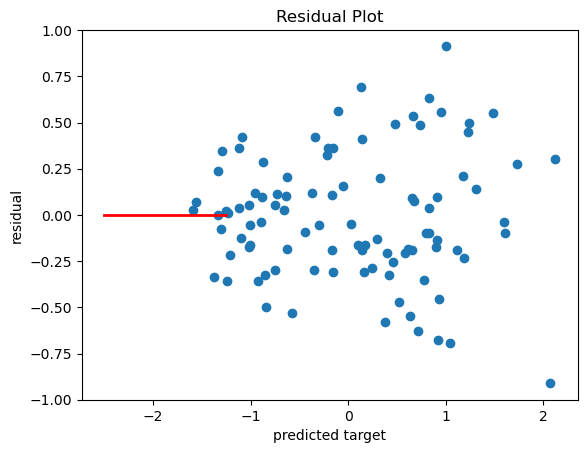

In [34]:
# Residual fit for training data
residual = out_attr - l1_cv_train_pred
plt.scatter(l1_cv_train_pred, residual)
plt.plot([-2.5,-1.25],[0,0],'r-', linewidth=2)
plt.xlabel('predicted target')
plt.ylabel('residual')
plt.title('Residual Plot')
plt.ylim([-1,1])
plt.show()

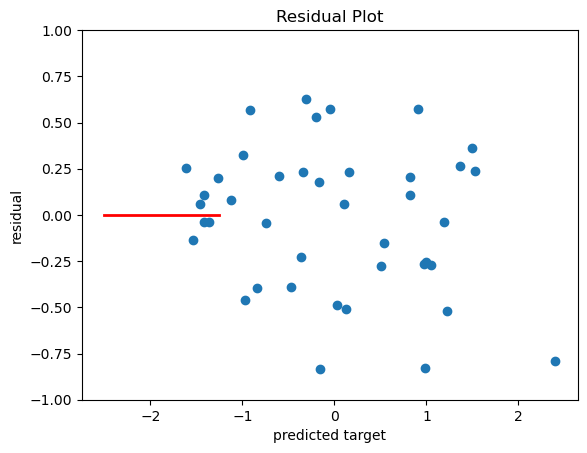

In [35]:
# Residual fit for testing data
residual = test_out_attr - l1_cv_test_pred
plt.scatter(l1_cv_test_pred, residual)
plt.plot([-2.5,-1.25],[0,0],'r-', linewidth=2)
plt.xlabel('predicted target')
plt.ylabel('residual')
plt.title('Residual Plot')
plt.ylim([-1,1])
plt.show()

In [36]:
# Training target
out_attr

array([ 0.1034731 ,  0.09532561,  0.1034731 ,  1.75741317,  1.50484104,
       -1.06976518, -1.22456745,  0.92636939,  0.52714247, -0.42611362,
        0.96710683, -0.96384783,  0.00570324, -1.04532271, -1.23271494,
       -0.35278623, -0.79275058, -1.16753503,  0.95081185,  1.21967896,
        0.07903063,  1.45595611, -0.46685106, -1.1919775 , -0.62165334,
       -0.05947666,  2.42550718,  2.00998529, -0.01873922,  0.82045204,
        0.42122513,  0.42937262,  0.168653  , -0.20613145, -1.37936972,
       -0.54017846, -0.53203097, -1.33863228,  0.20939044, -0.80904556,
        0.04644068,  1.67593829,  2.03442776,  0.69823972,  0.77156712,
       -1.18383001,  1.44780862, -1.11050262, -0.05947666, -1.22456745,
       -0.63794831, -1.42825465,  0.46196257, -1.28159987,  0.34789774,
        0.45381508,  0.15235803,  1.91221544, -0.25501638,  1.7329707 ,
       -1.55861446, -1.71341673,  1.38262872,  1.00784427,  0.73082968,
       -0.6460958 , -0.58906338,  0.3723402 ,  1.55372597, -0.84

In [37]:
# Training predictions
l1_cv_train_pred

array([-0.22313216,  0.41857414, -0.05175927,  0.70192264,  0.94535808,
       -1.01256661, -1.23555432,  1.11764267,  0.32589535, -0.62984022,
        0.47504281, -1.01810486,  0.16585166, -0.74712088, -1.25584918,
       -0.29731137, -0.8873547 , -1.00399468,  1.18659425,  0.73262174,
       -0.34180245,  0.82450856, -0.15611477, -1.0174806 , -0.73346602,
       -0.16985416,  2.12207959,  1.73335399,  0.03210434,  0.1298408 ,
        0.77484869,  0.61449775,  0.29709517,  0.37462674, -1.30191089,
       -0.44675738, -0.63687727, -0.84035423, -0.15296167, -0.62532686,
        0.51876618,  1.22742435,  1.48553586,  0.79835017,  0.90573208,
       -0.85923337,  1.30559342, -0.58103063,  0.10175008, -1.10095182,
       -0.66454435, -1.21045405,  0.65408934, -0.92454019,  1.03944802,
       -0.10742206, -0.21000221,  0.99651169, -0.37349487,  1.23807318,
       -1.58744052, -1.37838376,  1.17152826,  0.90872537,  0.82662627,
       -0.35076055, -0.87777015,  0.57965947,  1.5946103 , -0.95

In [38]:
# Testing target
test_out_attr

array([-0.39352367,  1.62705336,  0.33160276, -0.86607798, -0.38537618,
       -1.24086243,  1.76556065,  0.16050551,  1.61075838, -0.43426111,
        0.00570324, -0.79275058, -0.10836159,  1.03228673, -1.67267929,
       -1.03717522, -1.31418982, -1.36307475,  0.92636939,  0.32345527,
        0.38863518,  0.23383291,  0.73897716,  0.52714247,  0.38863518,
        0.70638721, -0.67053826,  0.7797146 , -0.59721087, -0.34463874,
        1.85518302, -0.9882903 , -0.45870358,  1.15449905, -1.40381219,
       -1.43640214,  0.69823972, -1.40381219,  0.15235803,  1.48039857,
       -1.06976518, -1.4608446 ])

In [39]:
# Testing predictions
l1_cv_test_pred

array([-0.60451455,  1.36255346, -0.19728838, -0.47454452,  0.1248882 ,
       -0.84385913,  1.52576053,  0.10221156,  2.40119552,  0.81456291,
       -0.17317607, -0.74861045, -0.34238419,  0.82442863, -1.53796004,
       -1.11991474, -1.42206705, -1.6159685 ,  0.81591845, -0.30478028,
        0.15820037,  0.50983786,  0.99213722, -0.04595019,  0.5380173 ,
        0.97326661, -0.99737245,  1.04990122, -0.36745983, -0.91335504,
        1.49550874, -0.15335779,  0.03009975,  1.19162655, -1.46275252,
       -0.97544897,  1.22049308, -1.36520266,  0.98211502,  0.90828088,
       -1.27027643, -1.42135562])

In [40]:
# Kaggle Predictions

In [41]:
# Portfolios for some reason missing from the zip file he gave us
missing_ports = [31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 
                 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 161, 162,
                 163, 164, 165, 166, 167, 168, 169, 170, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 271, 272, 273, 274,
                 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306,
                 307, 308, 309, 310, 321, 322, 323, 323, 324, 325, 326, 327, 328, 329, 330, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 361, 362, 363, 364, 365, 366, 367,
                368, 369, 370, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 471, 472, 473, 474, 475, 476, 477, 478, 479,
                480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 521,
                522, 523, 524, 525, 526, 527, 528, 529, 530, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 581, 582, 583,
                584, 585, 586, 587, 588, 589, 590]

In [42]:
# Generate predictions for Kaggle

In [43]:
# Create empty dataframe with column names
port_feats = pd.DataFrame(columns=feat_columns)

In [44]:
# Create features from kaggle portfolios and combine them into one dataframe
PATH = './testing_portfolios/'
port_ids = []
for i in range(1, 601):
    if i not in missing_ports:
        port_df = pd.read_csv(PATH+"test_portfolio_" + str(i) + '.csv')
        dma_mean = port_df['Driver_Minimum_Age'].mean()
        dma_std = port_df['Driver_Minimum_Age'].std()
        vay_mean = port_df['Vehicle_Age_In_Years'].mean()
        vay_std = port_df['Vehicle_Age_In_Years'].std()
        AP_mean = port_df['Annual_Premium'].mean()
        AP_std = port_df['Annual_Premium'].std()
        total_policies = len(port_df)
        vatd_na = len(port_df[port_df['Vehicle_Anti_Theft_Device'] == 'Not Applicable']) / total_policies
        vatd_passive = len(port_df[port_df['Vehicle_Anti_Theft_Device'] == 'Passive Disabling-Vehicle Recovery']) / total_policies
        vatd_alarm = len(port_df[port_df['Vehicle_Anti_Theft_Device'] == 'Alarm Only']) / total_policies
        vatd_active = len(port_df[port_df['Vehicle_Anti_Theft_Device'] == 'Active Disabling']) / total_policies
        port_data = {'DMA_MEAN': dma_mean, 'DMA_STD': dma_std, 'VAY_MEAN': vay_mean,
                      'VAY_STD': vay_std, 'AP_MEAN': AP_mean, 'AP_STD': AP_std,
#                      'VATD_Active': vatd_active,
#             'VATD_Alarm': vatd_alarm,
#             'VATD_NA': vatd_na,
            'VATD_Passive': vatd_passive}
        port_data_df = pd.DataFrame(port_data, [i])
        port_feats = pd.concat([port_feats, port_data_df], ignore_index=True)
        port_ids.append('portfolio_' + str(i))

In [45]:
# Kaggle portfolios
port_feats

,DMA_MEAN,DMA_STD,VAY_MEAN,VAY_STD,AP_MEAN,AP_STD,VATD_Passive
0,46.328000,15.592997,7.076000,2.564918,331.804800,204.172601,0.303000
1,45.958959,15.735645,7.095095,2.589087,325.044585,202.686500,0.318318
2,46.017000,16.136328,7.086000,2.570839,343.187790,239.118194,0.292000
3,45.947844,15.805586,7.219659,2.448033,335.759910,212.007607,0.291876
4,45.998998,15.951751,7.016032,2.557218,343.425481,210.267342,0.332665
...,...,...,...,...,...,...,...
325,45.585775,15.792478,6.913720,2.629667,346.887791,213.289475,0.328551
326,45.434484,15.843062,6.896628,2.622564,349.499843,210.195535,0.333535
327,45.534804,16.142965,6.919061,2.636657,349.270718,215.338782,0.335087
328,45.955565,16.181834,6.926278,2.623056,352.154357,216.410002,0.328822


In [46]:
# Standardizing the features
port_feats -= np.mean(port_feats, axis=0)
port_feats /= np.std(port_feats, axis=0)

In [47]:
# Standardized features
port_feats

,DMA_MEAN,DMA_STD,VAY_MEAN,VAY_STD,AP_MEAN,AP_STD,VATD_Passive
0,0.651050,-1.603580,0.833949,-0.601146,-0.734513,-0.358465,-1.068148
1,-0.323585,-0.948389,1.088868,0.012419,-1.699630,-0.516532,0.141735
2,-0.170299,0.891967,0.967449,-0.450829,0.890572,3.358477,-1.936959
3,-0.352941,-0.627148,2.751789,-3.568366,-0.169864,0.474895,-1.946783
4,-0.217842,0.044196,0.033380,-0.796622,0.924506,0.289794,1.274903
...,...,...,...,...,...,...,...
325,-1.309161,-0.687356,-1.332481,1.042576,1.418800,0.611239,0.949959
326,-1.708718,-0.455018,-1.560654,0.862257,1.791708,0.282156,1.343610
327,-1.443775,0.922451,-1.261177,1.220010,1.758997,0.829211,1.466174
328,-0.332549,1.100978,-1.164838,0.874745,2.170678,0.943150,0.971382


In [48]:
# Making predictions on the kaggle data
predictions = l1_cv.predict(port_feats)

C:\Users\pathi\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LassoCV was fitted without feature names
  warnings.warn(


In [49]:
# Kaggle natural log loss ratio predictions
predictions

array([-0.64203672, -0.49103054,  1.26245919, -0.89752488,  0.12620861,
       -1.51245746, -0.02801881,  0.13701031, -0.84227143, -0.03120405,
       -0.93436561, -1.17613607, -1.12675402, -1.02195917, -1.5016183 ,
       -0.56418696, -0.69669117,  1.23153661,  0.97981333,  1.2179221 ,
        0.94139261, -1.87972074, -0.61814827, -0.32029535,  0.8118227 ,
       -0.27357723,  0.29512071,  0.63728374, -1.01707376, -0.57090385,
        0.87497078, -0.8339363 , -1.02479997, -0.66983584,  1.13858607,
       -0.67905499, -0.00658983, -1.02752737,  0.47543959, -1.13934216,
       -0.53519874,  1.5786148 ,  1.16443407,  0.41685462, -0.39218811,
        0.35224358, -0.86323577,  1.21965751,  0.67773327,  0.08610723,
        0.70101298, -2.08506283,  0.45480939,  0.68216677, -0.43195811,
        0.14613643,  0.82786325,  1.73958464, -0.45815972,  0.45300299,
        0.51139936, -0.00888608, -0.36372311, -1.20140147, -0.4766406 ,
        1.71478693,  0.31112583,  0.47341423,  0.51105102, -1.72

In [50]:
# Preparing for submission to kaggle
port_predictions = pd.DataFrame({'ID': port_ids, 'ln_LR': predictions})

In [51]:
# Ready for submission
port_predictions

,ID,ln_LR
0,portfolio_1,-0.642037
1,portfolio_2,-0.491031
2,portfolio_3,1.262459
3,portfolio_4,-0.897525
4,portfolio_5,0.126209
...,...,...
325,portfolio_596,1.178073
326,portfolio_597,1.189014
327,portfolio_598,1.334141
328,portfolio_599,1.049109


In [52]:
# Write to CSV file
port_predictions.to_csv('kaggle_predictions_f1_with_va_passive.csv', index=False)